In [208]:
import json
import operator
from argparse import ArgumentParser
from collections import defaultdict
from functools import reduce
from pathlib import Path
from typing import List, Iterable, Any, Dict

from program_slicing.decomposition.block_slicing import build_opportunities
from program_slicing.decomposition.program_slice import ProgramSlice
from program_slicing.graph.parse import LANG_JAVA
from sortedcontainers import SortedDict
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from collections import Counter

IGNORE_USERS = {"zorchenkov.alexey@huawei.com", "zhyryk2021@rambler.ru", "cylyavaivai@gmail.com", "chizhyk2pyzhik@mail.ru"}
java_dir = Path(r'D:\git\program_slicing2\program_slicing\decomposition\files_iter2\java_files')
json_path = Path(r'D:\git\program_slicing2\program_slicing\decomposition\files_iter2\current_batch.json')

In [153]:
def get_web_configs():
    d = Path(r'D:\\git\\program_slicing2\\program_slicing\\decomposition\\files_iter2')
    small_config_filepath = d / 'web_config/small_config.json'
    large_config_filepath = d / 'web_config/large_config.json'
    with open(small_config_filepath) as f:
        small_config = json.loads(f.read())
    with open(large_config_filepath) as f:
        large_config = json.loads(f.read())

    return small_config, large_config

In [154]:
def get_all_methods_config(
        config: Dict[str, Any],
        max_answers_percentage=0.8):

    methods_dict = defaultdict(list)
   
    for x in all_configs:
        methods_dict[x['method_id']].append(x)
    return methods_dict
small_config, large_config = get_web_configs()
all_configs = large_config + small_config
all_methods_config = get_all_methods_config(all_configs)

In [155]:
def get_all_answers_dict(json_path):
    answers_by_users = {}
    with open(json_path) as f:
        answers = json.loads(f.read())
        
        for x in answers.get('data').get('listAnswers').get('items'):
            if x['user'] not in IGNORE_USERS:
                user_dict = answers_by_users.get(x['user'])
                if user_dict:
                    answers_by_method_id = user_dict.get(x['method'])
                    if answers_by_method_id:
                        sample_id = answers_by_method_id.get(x['question'])
                        if sample_id:
                            sample_id.append(x)
                        else:
                            answers_by_method_id[x['question']] = [x]
                    else:
                        user_dict[x['method']] = {x['question']: [x]}
                else:
                    answers_by_users[x['user']] = {x['method']: {x['question']: [x]}}
                
    return answers_by_users
all_answers_dict = get_all_answers_dict(json_path)

In [167]:
def filter_answers(all_answers_dict, all_methods_config, max_diff_ids=3):
    
    filtered_answers = defaultdict(list)
    for user, methods_dict in all_answers_dict.items():
#         print(user)
        for method_id, questions_dict in methods_dict.items():
            print(user, method_id)
            config_answers = {x['sample_id'] for x in all_methods_config[method_id]}
#             print(config_answers)
            user_answers = set(questions_dict.keys())
            diff = config_answers.difference(user_answers)
            if len(diff) <= max_diff_ids:
                filtered_answers[method_id].extend(questions_dict.values())
               
    new_filtered_answers = {}
    for method_id, vals in filtered_answers.items():
        new_vals = reduce(operator.concat, vals)
        new_filtered_answers[method_id] = new_vals
    return new_filtered_answers

filtered_answers = filter_answers(all_answers_dict, all_methods_config)
filtered_answers

websprogrammer@gmail.com method_16.java
websprogrammer@gmail.com method_14.java
websprogrammer@gmail.com method_12.java
websprogrammer@gmail.com method_19.java
websprogrammer@gmail.com method_18.java
websprogrammer@gmail.com method_8.java
websprogrammer@gmail.com method_10.java
websprogrammer@gmail.com method_15.java
websprogrammer@gmail.com method_17.java
websprogrammer@gmail.com method_13.java
websprogrammer@gmail.com method_11.java
andrei.tatarnikov@huawei.com method_8.java
andrei.tatarnikov@huawei.com method_3.java
andrei.tatarnikov@huawei.com method_5.java
andrei.tatarnikov@huawei.com method_1.java
andrei.tatarnikov@huawei.com method_0.java
andrei.tatarnikov@huawei.com method_9.java
andrei.tatarnikov@huawei.com method_4.java
andrei.tatarnikov@huawei.com method_6.java
andrei.tatarnikov@huawei.com method_7.java
andrei.tatarnikov@huawei.com method_2.java
wanghaitao6@huawei.com method_12.java
wanghaitao6@huawei.com method_11.java
wanghaitao6@huawei.com method_19.java
wanghaitao6@huawe

{'method_16.java': [{'id': 'f41f8ec3-270f-41bd-8545-b3b859032aaa',
   'question': 163,
   'answer': 'yes',
   'user': 'websprogrammer@gmail.com',
   'method': 'method_16.java',
   'createdAt': '2021-06-23T10:41:45.467Z',
   'updatedAt': '2021-06-23T10:41:45.467Z'},
  {'id': '6ae29e6e-7da1-46a2-aee2-3e33e44009c2',
   'question': 160,
   'answer': 'no',
   'user': 'websprogrammer@gmail.com',
   'method': 'method_16.java',
   'createdAt': '2021-06-23T09:51:08.010Z',
   'updatedAt': '2021-06-23T09:51:08.010Z'},
  {'id': '6f49ea04-8e4f-4a04-890a-420717dd37d5',
   'question': 161,
   'answer': 'yes',
   'user': 'websprogrammer@gmail.com',
   'method': 'method_16.java',
   'createdAt': '2021-06-23T10:34:06.210Z',
   'updatedAt': '2021-06-23T10:34:06.210Z'},
  {'id': '7a7d8385-8368-4c9d-a388-9f9ada5b5524',
   'question': 164,
   'answer': 'no',
   'user': 'websprogrammer@gmail.com',
   'method': 'method_16.java',
   'createdAt': '2021-06-23T10:21:48.887Z',
   'updatedAt': '2021-06-23T10:21:48.

In [238]:
#all_methods_config

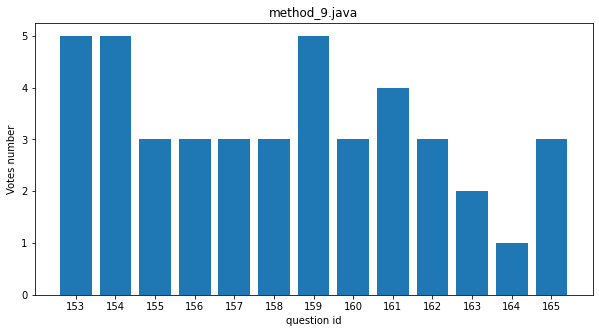

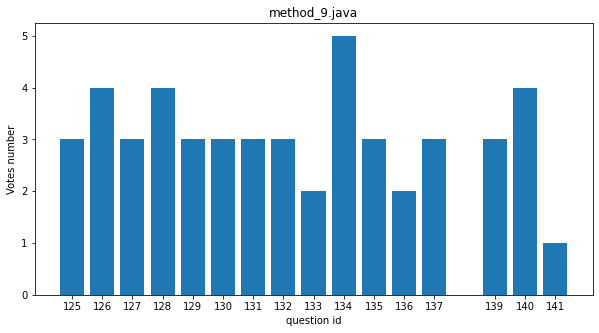

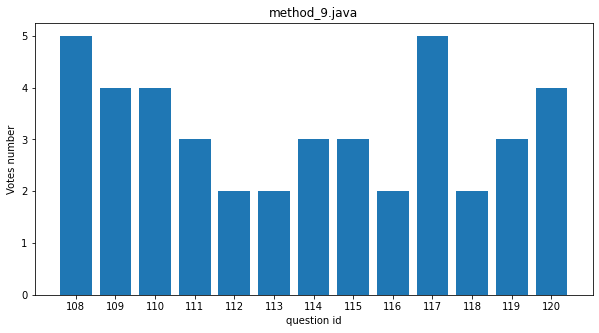

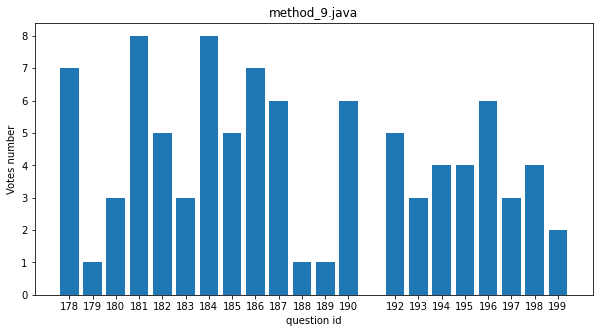

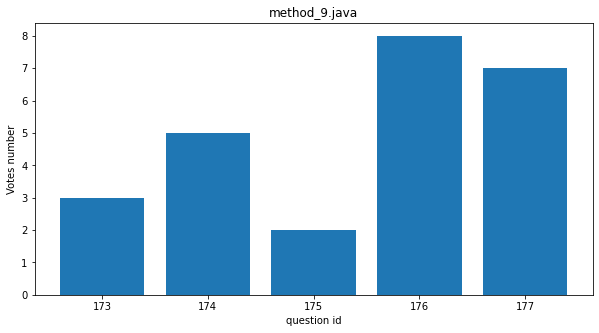

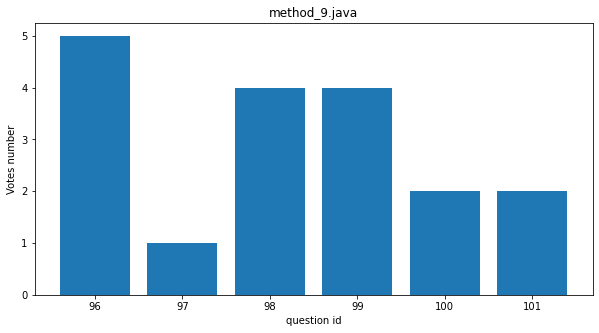

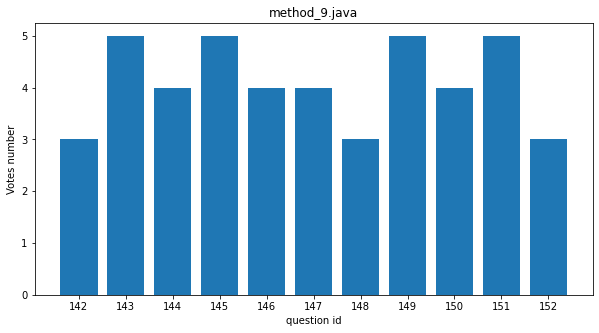

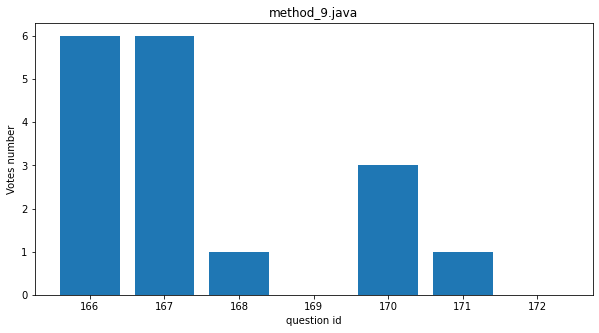

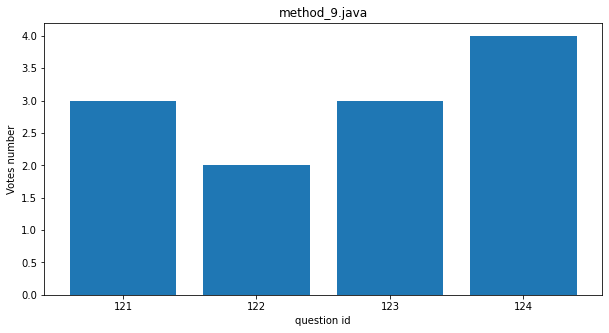

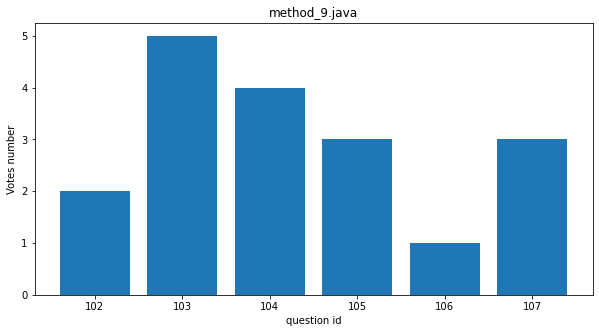

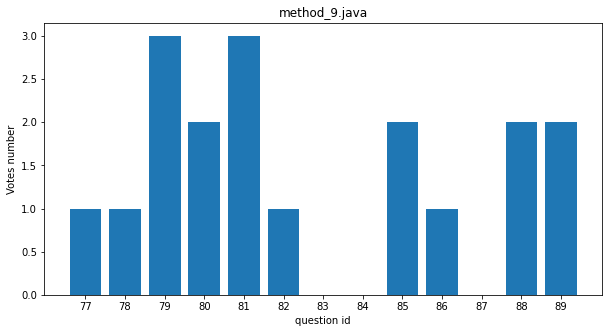

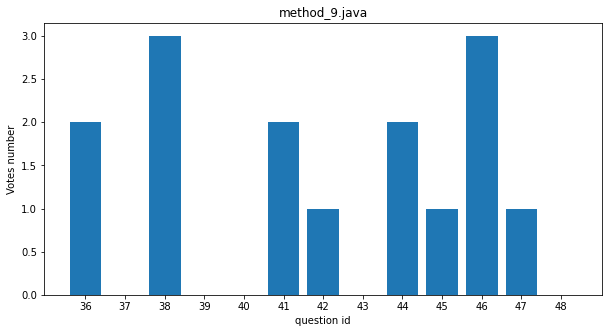

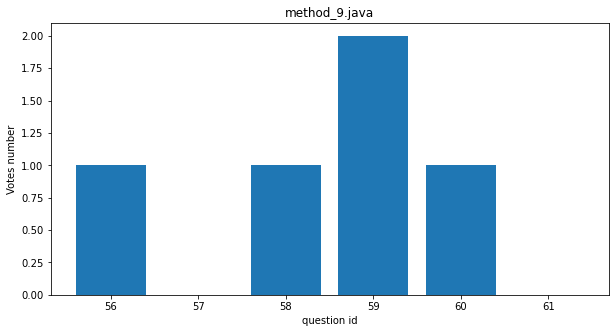

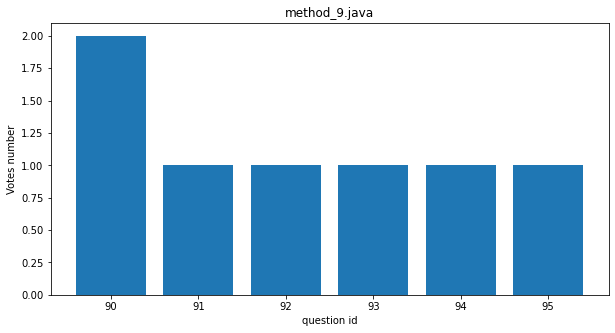

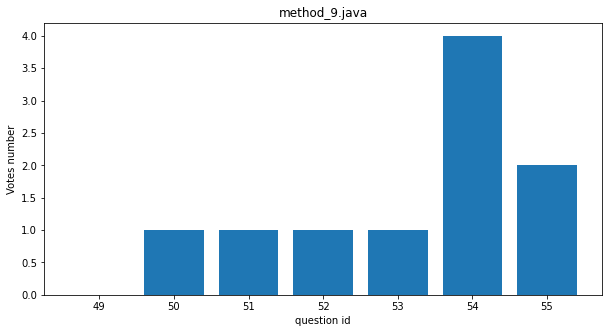

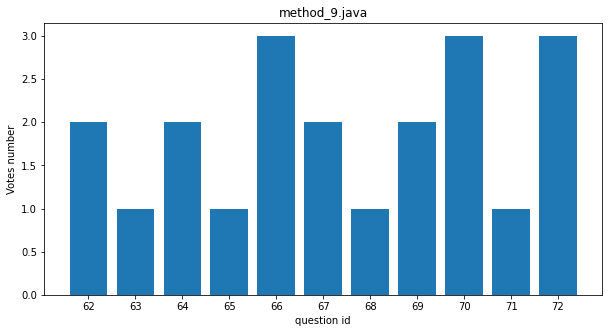

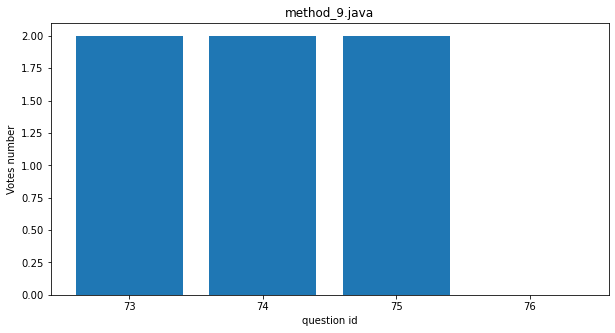

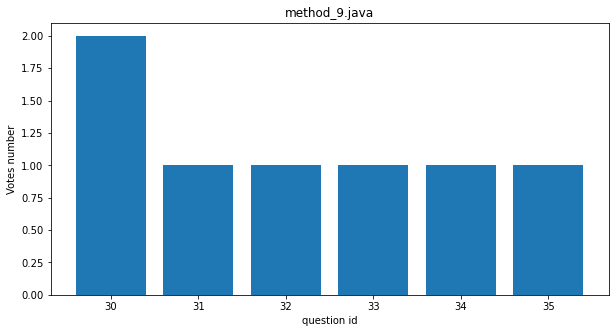

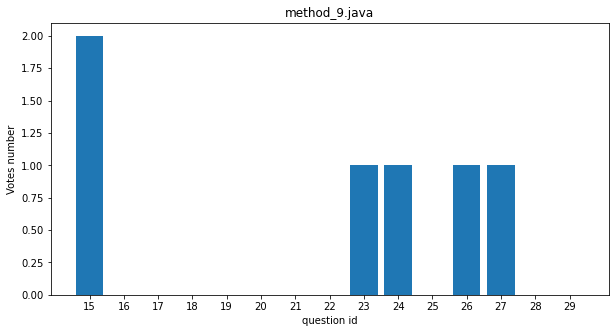

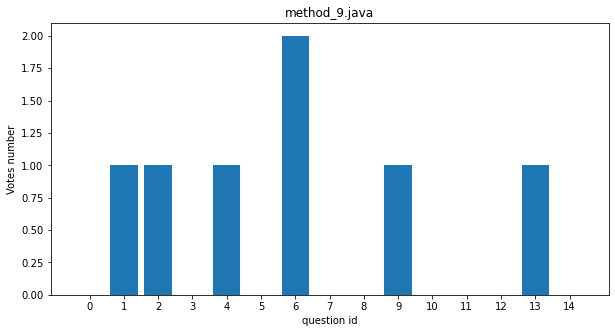

In [264]:
def show_bars(vals):
    plt.rcParams["figure.figsize"] = (10,5)
    plt.bar([int(x) for x in vals.keys()], [int(x) for x in vals.values()])
    plt.title(method_id)
    plt.xticks([int(x) for x in vals.keys()])
    plt.xlabel('question id')
    plt.ylabel('Votes number')
    plt.show()
    


def find_not_answered_questions(filtered_answers):
    ans_yes = defaultdict(list)
#     ans_no = defaultdict(list)
    for method_id, answers in filtered_answers.items():
        for x in answers:
            if x['answer'] == "yes":
                ans_yes[method_id].append(x['question'])
    #         else:
    #             ans_no[method_id].append(['question']})

    all_vals = {}
    for method_id, answers in ans_yes.items():
    #     ans = reduce(operator.concat, [list(x.values()) for x in answers])
        answered = set(ans_yes[method_id])
        config_items = {x['sample_id'] for x in all_methods_config.get(method_id)}
    #     print(method_id, config_items)
        # find which answers were no or were not answered at all  
        missed = config_items.difference(answered)
        missed_dict = {}
        if missed:
            missed_dict = {x: 0 for x in missed}
    #         print('Missed ', method_id, missed_dict)
        vals = {**Counter(answers), **missed_dict}
        not_answered_by_users = {x for x, y in vals.items() if y == 0}
        if not_answered_by_users:
            all_vals[method_id] = not_answered_by_users
    #     print(method_id, vals)
        show_bars(vals)
    
    return all_vals

not_answered = find_not_answered_questions(filtered_answers)

In [263]:
print('not_answered: ', not_answered)

for method_id, d in all_methods_config.items():
    not_answered_q = not_answered.get(method_id)
    if not_answered_q:
        print(method_id, [x['html'] for x in d if x['sample_id'] in not_answered_q])

not_answered:  {'method_17.java': {169, 172}, 'method_8.java': {83, 84, 87}, 'method_3.java': {37, 39, 40, 43, 48}, 'method_5.java': {57, 61}, 'method_4.java': {49}, 'method_7.java': {76}, 'method_1.java': {16, 17, 18, 19, 20, 21, 22, 25, 28, 29}, 'method_0.java': {0, 3, 5, 7, 8, 10, 11, 12, 14}}
method_17.java ['examples/method_17_49_62.html', 'examples/method_17_56_67.html']
method_0.java ['examples/method_0_3_9.html', 'examples/method_0_19_40.html', 'examples/method_0_21_40.html', 'examples/method_0_23_40.html', 'examples/method_0_23_42.html', 'examples/method_0_24_34.html', 'examples/method_0_24_35.html', 'examples/method_0_24_36.html', 'examples/method_0_26_32.html']
method_1.java ['examples/method_1_3_19.html', 'examples/method_1_4_19.html', 'examples/method_1_5_16.html', 'examples/method_1_5_28.html', 'examples/method_1_7_16.html', 'examples/method_1_7_19.html', 'examples/method_1_7_28.html', 'examples/method_1_9_15.html', 'examples/method_1_20_28.html', 'examples/method_1_20_30